In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import warnings
import random
from matplotlib.ticker import PercentFormatter  
from matplotlib.dates import DateFormatter
from datetime import datetime
from pandas import read_csv
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

warnings.simplefilter('ignore') # filter some warning messages
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd

def dt64_to_float(dt64):
    """Converts numpy.datetime64 to year as float.

    Rounded to days

    Parameters
    ----------
    dt64 : np.datetime64 or np.ndarray(dtype='datetime64[X]')
        date data

    Returns
    -------
    float or np.ndarray(dtype=float)
        Year in floating point representation
    """

    year = dt64.astype('M8[Y]')
    # print('year:', year)
    days = (dt64 - year).astype('timedelta64[D]')
    # print('days:', days)
    year_next = year + np.timedelta64(1, 'Y')
    # print('year_next:', year_next)
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')
                    ).astype('timedelta64[D]')
    # print('days_of_year:', days_of_year)
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    # print('dt_float:', dt_float)
    return dt_float

if __name__ == "__main__":

    dates = np.array([
        '1970-01-01', '2014-01-01', '2020-12-31', '2019-12-31', '2010-04-28'],
        dtype='datetime64[D]')

    df = pd.DataFrame({
        'date': dates,
        'number': np.arange(5)
        })

    df['date_float'] = dt64_to_float(df['date'].to_numpy())


    dt64 = np.datetime64( "2011-11-11" )
    
#Inladen + sorteren van de dataset op regio
#Geeft het aantal unieke systemen in de verschillende regio's

data = pd.read_excel (r'FulldataEXCEL.xlsx',sheet_name = 'Above30mg')
df = pd.DataFrame(data,columns= ['FECHA DE MUESTREO','SISTEMA DE ABASTECIMIENTO','RESULTADO','PUNTO DE MUESTREO','CANTÓN'])
# display(df)
SortData = df.sort_values(by=['FECHA DE MUESTREO'], ascending=True)
# display(SortData)
#Dit hoeft niet eens, omdat er geen nul waarde in de data set zitten 
Cartago=SortData.dropna(subset=['RESULTADO'])
# display(SortData2)
Cartago.replace('ALVARADO', 'Alvarado', inplace=True)
Cartago.replace('CARTAGO', 'Cartago', inplace=True)
Cartago.replace('OREAMUNO', 'Oreamuno', inplace=True)
Cartago.replace('PARAÍSO', 'Paraíso', inplace=True)

counts = Cartago['CANTÓN'].value_counts()
display(counts)
Cartago_city = Cartago[Cartago["CANTÓN"] == 'Cartago']
Oreamuno = Cartago[Cartago["CANTÓN"] == 'Oreamuno']
Paraíso = Cartago[Cartago["CANTÓN"] == 'Paraíso']
Alvarado = Cartago[Cartago["CANTÓN"] == 'Alvarado']
El_Guarco = Cartago[Cartago["CANTÓN"] == 'El Guarco']

#In de meeste cellen staan dus meerdere waardes, die worden hier gesplits 
#en van elke value wordt een nieuwe rij gemaakt 

def splitDataFrameList(df,target_column,separator,output_type=float):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

Oreamuno     171
Cartago      138
Paraíso       35
El Guarco     21
Alvarado      20
GUARCO        10
CARTAGO        4
OREAMUNO       1
Name: CANTÓN, dtype: int64

In [3]:
#In deze cel worden de volgende handelingen uitgevoerd: Creeëren van een nieuwe
#excel, het sorteren van de dataset op 'Resultaten van hoog --> laag', 
#de datums, resultaten en syteem namen worden geextract


Cartago_city.to_excel('Cartago_city.xlsx')
Cartago_city2 = pd.read_excel (r'Cartago_city.xlsx',index_col=1,parse_dates=True )
Cartago_city3 = pd.DataFrame(Cartago_city2,columns= ['SISTEMA DE ABASTECIMIENTO','RESULTADO','CANTÓN','PUNTO DE MUESTREO'])
# Cartago_city3.sort_values(by=['RESULTADO'],ascending=False, inplace=True)
#Tijd
dates_input = Cartago_city3.index.values.astype('datetime64[D]')
Time = dt64_to_float(dates_input)
Time_rounded = np.round(Time,3)
# #Resultaten
Resultado = Cartago_city3['RESULTADO']
# #Systeem namen, deze zijn echter niet allen uniek --> 

Locaties = Cartago_city3['PUNTO DE MUESTREO']

# #Daarom wordt deze functies gecreert die alleen systemen met een unieke naam 
# #eruit filteren en samenvoegen in een array

Systema = Cartago_city3['SISTEMA DE ABASTECIMIENTO']
print(len(Systema))
def VulFunc(Naam_Array,Naam_Array_leeg):
    k =1
    for j in range(len(Naam_Array_leeg)+1):
        if j+1 == (len(Naam_Array_leeg)+1)and k==1:
            Naam_Array_leeg.append(Naam_Array)

        else:
#             print('door')
            for i in range(len(Naam_Array_leeg)):
                if Naam_Array != Naam_Array_leeg[i]:
                    continue
                else:
                    k = 2 
    return Naam_Array_leeg

# display(Cartago_city3.head(112))

138


In [4]:
#Hier wordt de lege array opgevuld met de unieke systeem namen
display(Cartago_city3)
systema_unique = []
for i in range(len(Cartago_city3['SISTEMA DE ABASTECIMIENTO'])):
    VulFunc(Cartago_city3['SISTEMA DE ABASTECIMIENTO'][i],systema_unique)
print(systema_unique)
print(len(systema_unique))


,SISTEMA DE ABASTECIMIENTO,RESULTADO,CANTÓN,PUNTO DE MUESTREO
FECHA DE MUESTREO,,,,
2007-04-19,RESIDENCIAL EL MOLINO DE CARTAGO,33.92,Cartago,POZO 1
2008-09-19,BANDERILLA DE SAN NICOLÁS,85.20,Cartago,NACIENTE LA MISIÓN
2009-04-17,BANDERILLA DE SAN NICOLÁS,136.63,Cartago,NACIENTE CALVO 1 (BANDERILLA)
2009-04-17,BANDERILLA DE SAN NICOLÁS,115.37,Cartago,NACIENTE CALVO 2 (BANDERILLA)
2009-10-03,TIERRA BLANCA DE CARTAGO,37.82,Cartago,MEZCLA DE NACIENTES
...,...,...,...,...
2021-09-15,SAN BLAS DEL CARMEN DE CARTAGO: SECTOR NORTE O...,45.85,Cartago,NACIENTE SAN BLAS
2021-09-16,SAN BLAS DE EL CARMEN DE CARTAGO: CENTRO,41.01,Cartago,RED 2
2021-09-16,SAN BLAS DE EL CARMEN DE CARTAGO: CENTRO,41.00,Cartago,NACIENTE LANKASTER


['RESIDENCIAL EL MOLINO DE CARTAGO', 'BANDERILLA DE SAN NICOLÁS', 'TIERRA BLANCA DE CARTAGO', 'CIUDADELA GRACIANO Y LA TRINIDAD DE TIERRA BLANCA', 'SAN FRANCISCO Y SANTA EDUVIGES DE TIERRA BLANCA', 'LA MISIÓN DE TIERRA BLANCA', 'LLANO GRANDE DE CARTAGO: SECTOR NACIENTE EMPALOO', 'LLANO GRANDE DE CARTAGO: SECTOR FUENTES SAN LUIS', 'LLANO GRANDE CARTAGO: SECTOR BARRIO LOS ÁNGELES', 'TIERRA BLANCA DE CARTAGO: SECTOR CIUDADELA LA MISIÓN', 'TIERRA BLANCA: SAN FRANCISCO Y SANTA EDUVIGES', 'TIERRA BLANCA: CIUDADELA GRACIANO Y LA TRINIDAD', 'CERROS DE SAN NICOLAS', 'SAN BLAS DE EL CARMEN DE CARTAGO: SECTOR NORTE', 'EL CARMEN DE CARTAGO: SECTORES CENTRO Y SUR', 'SAN BLAS DE EL CARMEN DE CARTAGO: CENTRO', 'TIERRA BLANCA DE CARTAGO: SECTOR LA MISION', 'LLANO GRANDE CARTAGO: SECT. BARRIO LOS ANGELES Y PAVAS', 'TIERRA BLANCA DE CARTAGO: SECTOR LA MISIÓN', 'CARTAGO: SECTORES ABASTECIDOS PLANTA DE TRATAMIENTO', 'SANTA ELENA DE CORRALILLO DE CARTAGO', 'EL CARMEN DE CARTAGO SECTOR CENTRO Y SUR', 'SAN B

In [5]:
#in deze functie worden de drie elementen gecombineerd: Tijd, Resultaen en 
#systemen. Aleen de systemen waarbij de waarde boven de 50 uitkomt zal worden
#geplot. De output is een grafiek met twee threshold values + dataplotten over
#tijd en de hoeveelheid data punten aangegeven door de individuele 
#markeerpunten. Daarnaast worden de probleem gevallen nitraat hoeveelheden > 50, 
#opgeslagen in de array: 'Problems'
def Sub_systemen(nummer):
    SAN_RAFAEL_DE_OREAMUNO_CENTRO = np.zeros(251)
    SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME = np.zeros(251)
#     SAN_RAFAEL_DE_OREAMUNO_CENTRO_lOCATION = np.zeros(251)
    for i in range(138):
        if Systema[i]== systema_unique[nummer]:
                SAN_RAFAEL_DE_OREAMUNO_CENTRO[i] = Resultado[i]
                SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME[i] = Time_rounded[i]
#                 SAN_RAFAEL_DE_OREAMUNO_lOCATION[i] = Locaties[i]
    #             print('ja') 

    a = SAN_RAFAEL_DE_OREAMUNO_CENTRO
    a0 = a[a != 0]
    b = SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME
    b0 = b[b != 0]
#     c = SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION
#     c0 = c[c != 0]
    
    
    m = 1 
    for i in range(len(a0)):
        if a0[i] > 30:
            plt.title(f'{systema_unique[nummer]}', color = 'red')
#             Problems.append(f'{systema_unique[nummer]}')
            plt.ylabel('Nitrate in mg/l')
#             axs[i,j].plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12)
            plt.plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12)
            plt.axhline(40, color = 'yellow')
            plt.axhline(50, color = 'red')
            plt.xticks(rotation=90)
            plt.xlim([2009, 2022])
            plt.title(f'{systema_unique[nummer]}',fontsize = 13)
            m = 2 
            break
    return  plt.plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12);
#, a0, b0, Problems

In [6]:
#Deze functie wordt gebruikt om onderscheidt te maken tussen de subplots die 
#wel >50 en niet <50 geplot moeten worden, door een m = 1 of m = 2 toe te wijzen. 
def Sub_systemen_m(nummer):
    SAN_RAFAEL_DE_OREAMUNO_CENTRO = np.zeros(251)
    SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME = np.zeros(251)
#     SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION = np.zeros(251)
    for i in range(112):
        if Systema[i]== systema_unique[nummer]:
                SAN_RAFAEL_DE_OREAMUNO_CENTRO[i] = Resultado[i]
                SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME[i] = Time_rounded[i]
#                 SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION[i] = Locaties[i]
    #             print('ja') 

    a = SAN_RAFAEL_DE_OREAMUNO_CENTRO
    a0 = a[a != 0]
    b = SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME
    b0 = b[b != 0]
#     c = SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION
#     c0 = c[c != 0]
    
    m = 1 
    for i in range(len(a0)):
        if a0[i] > 30:
            m = 2 
            break
    return  m



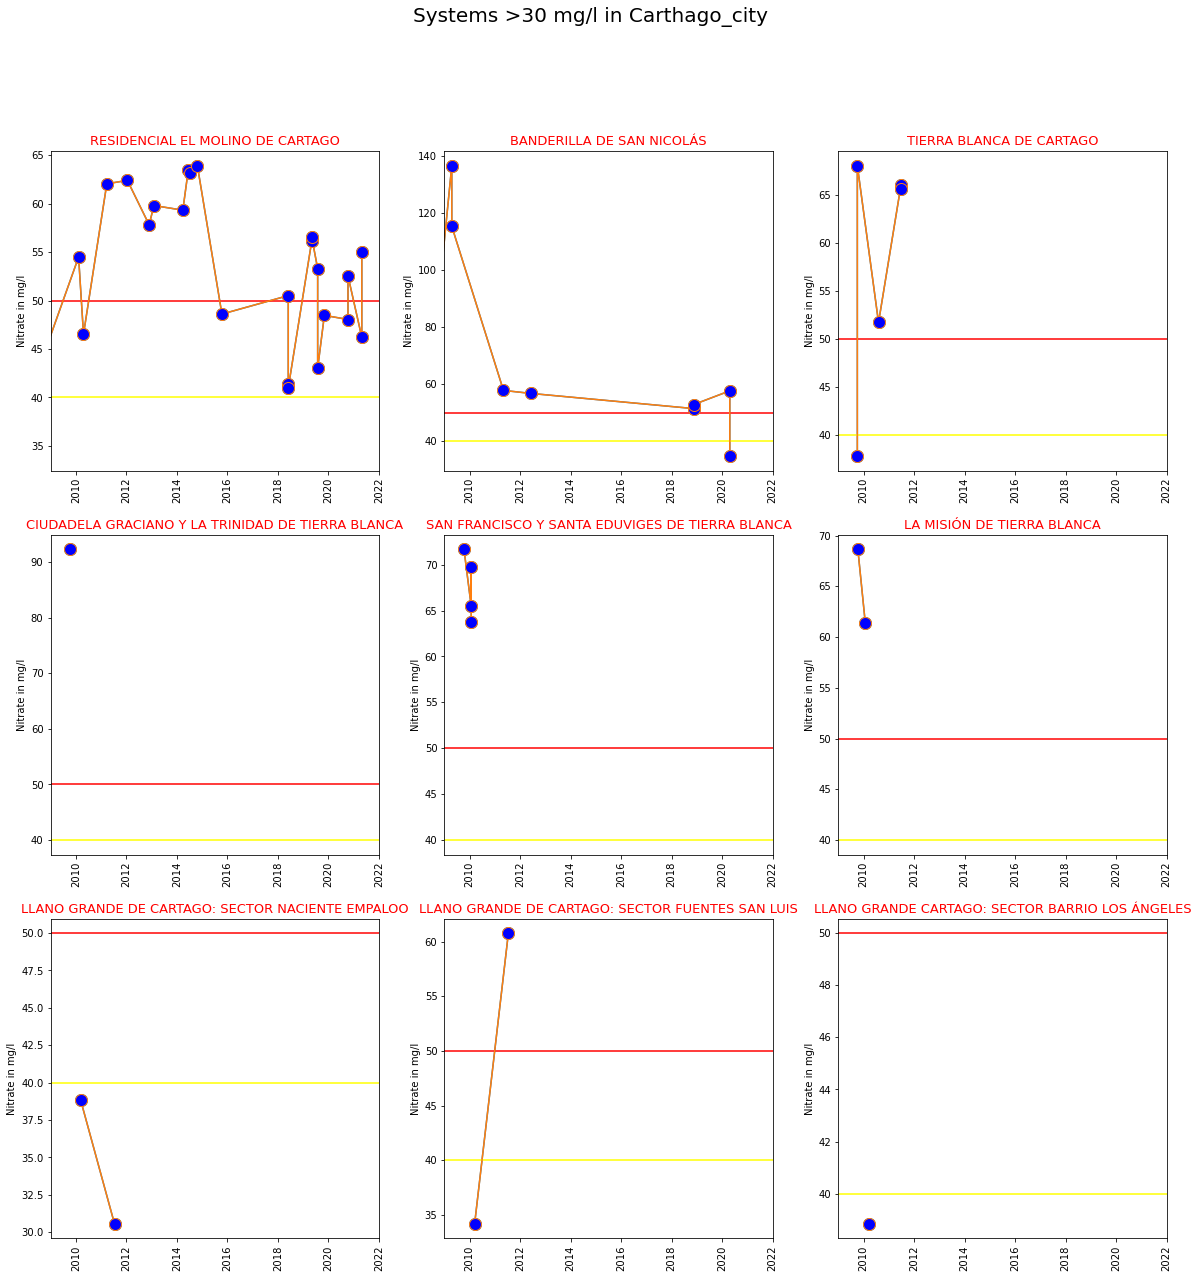

In [7]:
fig = plt.figure(figsize=(20,20));
for i in range(9):
    if Sub_systemen_m(i) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i))
# print(Problems)  
fig.suptitle('Systems >30 mg/l in Carthago_city',fontsize = 20 ) 
fig.savefig('First_9_Cartago_City_timeline_from30mg')

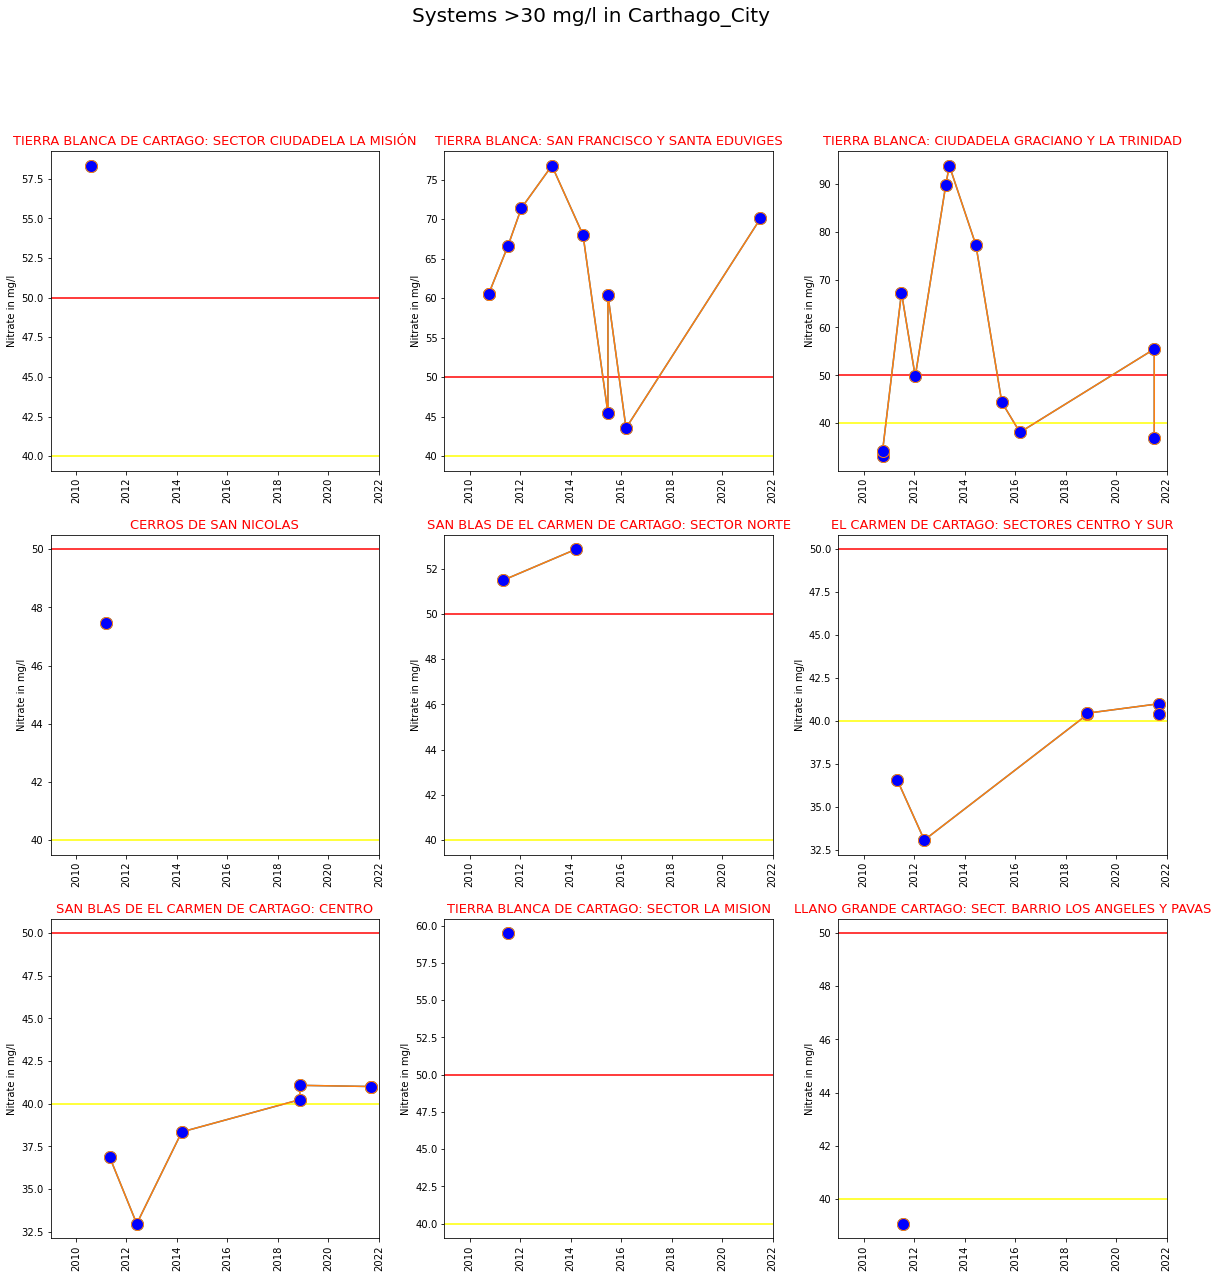

In [8]:
fig = plt.figure(figsize=(20,20));
for i in range(9):
    if Sub_systemen_m(i+9) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i+9))
# print(Problems)  
fig.suptitle('Systems >30 mg/l in Carthago_City',fontsize = 20 ) 
fig.savefig('Second_9_Cartago_City_imeline_from30mg')

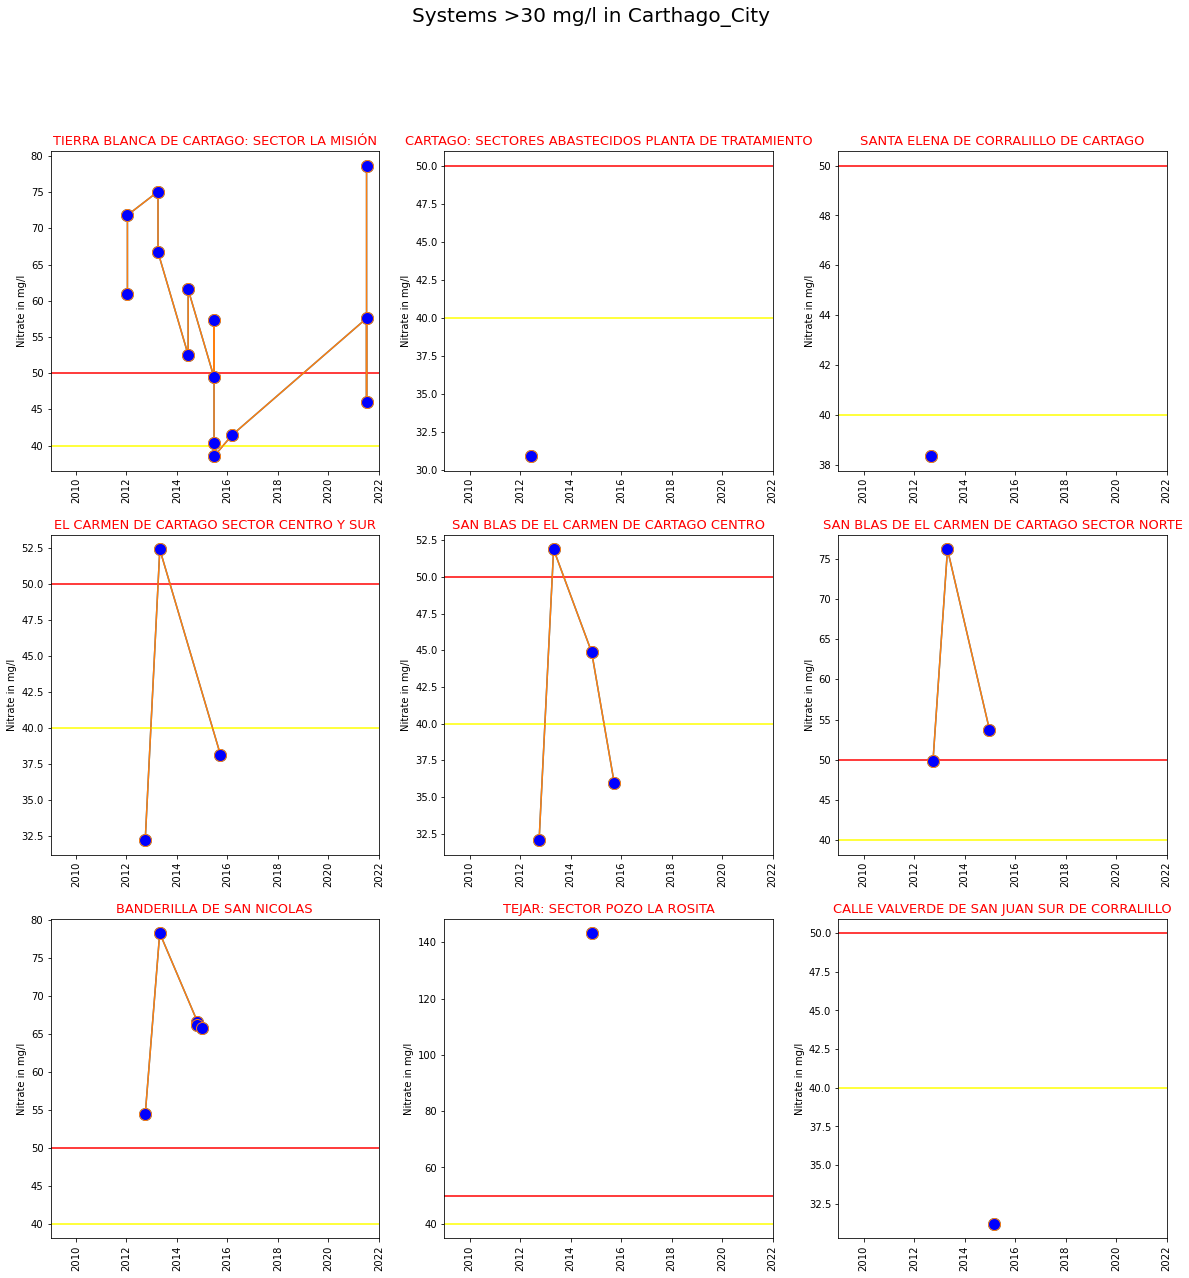

In [9]:
fig = plt.figure(figsize=(20,20));
for i in range(9):
    if Sub_systemen_m(i+18) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i+18))
# print(Problems)  
fig.suptitle('Systems >30 mg/l in Carthago_City',fontsize = 20 ) 
fig.savefig('Third_9_Cartago_City_timeline_from30mg')

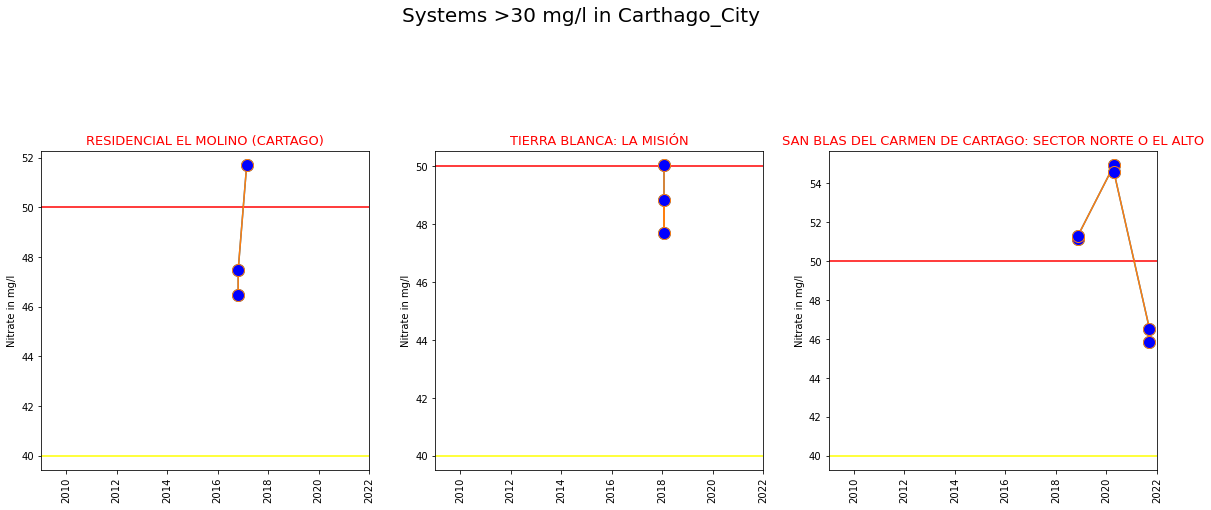

In [10]:
fig = plt.figure(figsize=(20,20));
for i in range(6):
    if Sub_systemen_m(i+27) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i+27))
# print(Problems)  
fig.suptitle('Systems >30 mg/l in Carthago_City',fontsize = 20 ) 
fig.savefig('Fourth_9_Cartago_City_timeline_30mg')

In [11]:
display(Resultado)

FECHA DE MUESTREO
2007-04-19     33.92
2008-09-19     85.20
2009-04-17    136.63
2009-04-17    115.37
2009-10-03     37.82
               ...  
2021-09-15     45.85
2021-09-16     41.01
2021-09-16     41.00
2021-09-17     41.01
2021-09-17     40.43
Name: RESULTADO, Length: 138, dtype: float64

In [12]:
import pandas as pd
# interval = pd.Interval(pd.Timestamp('2020-01-01 00:00:00'), pd.Timestamp('2021-01-01 00:00:00'), closed='left')
# print(interval)
Resultado = Cartago_city3['RESULTADO']
# display(Cartago_city3)
Resultado.index

Year2008 = Resultado.loc['2008-01-01':'2009-01-01']
Year2009 = Resultado.loc['2009-01-01':'2010-01-01']
Year2010 = Resultado.loc['2010-01-01':'2011-01-01']
Year2011 = Resultado.loc['2011-01-01':'2012-01-01']
Year2012 = Resultado.loc['2012-01-01':'2013-01-01']
Year2013 = Resultado.loc['2013-01-01':'2014-01-01']
Year2014 = Resultado.loc['2014-01-01':'2015-01-01']
Year2015 = Resultado.loc['2015-01-01':'2016-01-01']
Year2016 = Resultado.loc['2016-01-01':'2017-01-01']
Year2017 = Resultado.loc['2017-01-01':'2018-01-01']
Year2018 = Resultado.loc['2018-01-01':'2019-01-01']
Year2019 = Resultado.loc['2019-01-01':'2020-01-01']
Year2020 = Resultado.loc['2020-01-01':'2021-01-01']
Year2021 = Resultado.loc['2021-01-01':'2022-01-01']

Years = [Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2018,Year2019,Year2020,Year2021]

# Year2010.countplot()
display(Years[5])


FECHA DE MUESTREO
2014-03-14     38.35
2014-03-14     52.86
2014-03-29     59.34
2014-06-14     52.54
2014-06-14     61.56
2014-06-14     77.18
2014-06-16     63.51
2014-06-28     68.02
2014-07-04     63.21
2014-10-25     63.94
2014-10-27     66.57
2014-10-27     66.12
2014-10-31    143.26
2014-10-31     44.87
2014-12-26     53.76
2014-12-26     65.77
Name: RESULTADO, dtype: float64

In [13]:
def IndepthAnalysisHist(year):
    box40 = []
    box50 = []
    box60 = []
    box70 = []
    box80 = []
    box90 = []
    box100 = []
    for i in range(len(year)):
        if year[i]>30 and year[i]<40:
            box40.append(year[i])
    for i in range(len(year)):
        if year[i]>40 and year[i]<50:
            box50.append(year[i])
    for i in range(len(year)):
        if year[i]>50 and year[i]<60:
            box60.append(year[i])
    for i in range(len(year)):
        if Year2010[i]>60 and year[i]<70:
            box70.append(year[i])
    for i in range(len(year)):
        if year[i]>70 and year[i]<80:
            box80.append(year[i])
    for i in range(len(year)):
        if year[i]>90 and year[i]<100:
            box90.append(year[i])
    for i in range(len(year)):
            box100.append(year[i])

    totBox = box40 + box50 + box60 + box70 + box80 + box90 + box100
    totLen = len(box40) + len(box50) + len(box60) + len(box70) + len(box80) + len(box90) + len(box100)
    Percentage = [len(box40)/totLen,len(box50)/totLen,len(box60)/totLen,len(box70)/totLen,len(box80)/totLen,len(box90)/totLen,len(box100)/totLen]
    df = pd.DataFrame(totBox)
    plt.hist(totBox, weights=np.ones(len(totBox))/len(totBox),bins=[30,40,50,60,70,80,90,100], color='gray', stacked=True)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('%TOT')
    plt.xlabel('mg/L Nitrate')

    return 

None


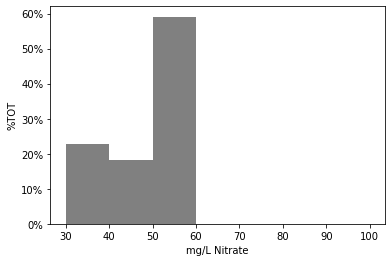

In [14]:
print(IndepthAnalysisHist(Year2020))


In [15]:
def IndepthAnalysisBoxplot(year):
    box40 = []
    box50 = []
    box60 = []
    box70 = []
    box80 = []
    box90 = []
    box100 = []
    for i in range(len(year)):
        if year[i]>30 and year[i]<40:
            box40.append(year[i])
    for i in range(len(year)):
        if year[i]>40 and year[i]<50:
            box50.append(year[i])
    for i in range(len(year)):
        if year[i]>50 and year[i]<60:
            box60.append(year[i])
    for i in range(len(year)):
        if Year2010[i]>60 and year[i]<70:
            box70.append(year[i])
    for i in range(len(year)):
        if year[i]>70 and year[i]<80:
            box80.append(year[i])
    for i in range(len(year)):
        if year[i]>90 and year[i]<100:
            box90.append(year[i])
    for i in range(len(year)):
        if year[i]>100:
            box100.append(year[i])

    totBox = box40 + box50 + box60 + box70 + box80 + box90 + box100
    totLen = len(box40) + len(box50) + len(box60) + len(box70) + len(box80) + len(box90) + len(box100)
    Percentage = [len(box40)/totLen,len(box50)/totLen,len(box60)/totLen,len(box70)/totLen,len(box80)/totLen,len(box90)/totLen,len(box100)/totLen]
    data = pd.DataFrame(totBox)
    plt.boxplot(data[0])
    plt.ylabel('mg/l Nitrate')
    return 


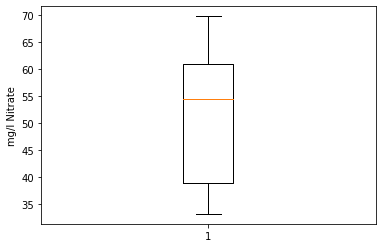

In [16]:
IndepthAnalysisBoxplot(Year2010);

In [17]:
def Data(year):
    box40 = []
    box50 = []
    box60 = []
    box70 = []
    box80 = []
    box90 = []
    box100 = []
    for i in range(len(year)):
        if year[i]>30 and year[i]<40:
            box40.append(year[i])
    for i in range(len(year)):
        if year[i]>40 and year[i]<50:
            box50.append(year[i])
    for i in range(len(year)):
        if year[i]>50 and year[i]<60:
            box60.append(year[i])
    for i in range(len(year)):
        if year[i]>60 and year[i]<70:
            box70.append(year[i])
    for i in range(len(year)):
        if year[i]>70 and year[i]<80:
            box80.append(year[i])
    for i in range(len(year)):
        if year[i]>90 and year[i]<100:
            box90.append(year[i])
    for i in range(len(year)):
        if year[i]>100:
            box100.append(year[i])

    totBox = box40 + box50 + box60 + box70 + box80 + box90 + box100
    totLen = len(box40) + len(box50) + len(box60) + len(box70) + len(box80) + len(box90) + len(box100)
    Percentage = [len(box40)/totLen,len(box50)/totLen,len(box60)/totLen,len(box70)/totLen,len(box80)/totLen,len(box90)/totLen,len(box100)/totLen]
    data = pd.DataFrame(totBox)

    return data.mean()

print(Data(Year2014))

0    65.05375
dtype: float64


   Years      Means
0   2009  84.358571
1   2010  51.454000
2   2011  53.420714
3   2012  48.982667
4   2013  70.096667
5   2014  65.053750
6   2015  44.530000
7   2016  43.424000
8   2018  46.315714
9   2019  51.498000
10  2020  47.853333
11  2021  50.125714


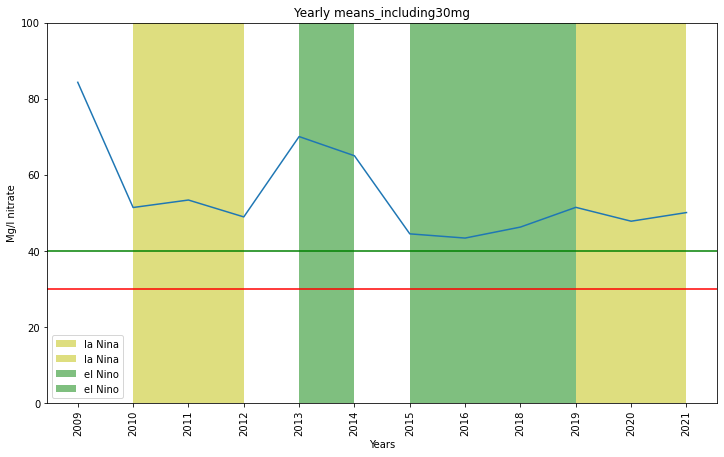

In [18]:
YearsNames = ['2009','2010','2011','2012','2013','2014','2015','2016','2018','2019','2020','2021']
Years = [Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2018,Year2019,Year2020,Year2021]

Means = []
for i in range(12):
    Means.append(Data(Years[i])[0])
plt.figure(figsize=(12,7))

data = {'Years':YearsNames, 'Means':Means}
MeansData = pd.DataFrame(data)
print(MeansData)

fig = plt.plot(MeansData['Years'],MeansData['Means'])

plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Mg/l nitrate')

plt.axvspan(1, 3, facecolor='y', alpha=0.5, label = 'la Nina')
plt.axvspan(9, 11, facecolor='y', alpha=0.5, label = 'la Nina')
plt.axvspan(4, 5, facecolor='g', alpha=0.5, label = 'el Nino')
plt.axvspan(6, 9, facecolor='g', alpha=0.5, label = 'el Nino')
plt.legend()
plt.ylim(0,100)
plt.axhline(40, color = 'green')
plt.axhline(30, color = 'red')

plt.title('Yearly means_including30mg')
plt.savefig('Yearly means_Cartago_city_from30mg')

In [19]:
print(MeansData['Years'])
print(MeansData['Means'])
MeansData['Years'],MeansData['Means']

Export2013 = [MeansData['Years'],MeansData['Means']]


0     2009
1     2010
2     2011
3     2012
4     2013
5     2014
6     2015
7     2016
8     2018
9     2019
10    2020
11    2021
Name: Years, dtype: object
0     84.358571
1     51.454000
2     53.420714
3     48.982667
4     70.096667
5     65.053750
6     44.530000
7     43.424000
8     46.315714
9     51.498000
10    47.853333
11    50.125714
Name: Means, dtype: float64


In [20]:
CR=read_csv('Cartago, costa rica 2009-01-01 to 2022-12-31.csv', parse_dates=[0],skiprows=[1], skipinitialspace=True, index_col=1)

In [21]:
plt.figure(figsize=[15,9])
plt.plot(CR['precip'])
# plt.plot(Resultado,'or')
plt.ylabel('Precipitation [mm/d]')
plt.xlabel('year')
plt.plot(Resultado[2:],'ro')


plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

<Figure size 1080x648 with 1 Axes>

In [22]:
print(Resultado.index)
CR.index=pd.to_datetime(CR.index)
print(CR['precip'].index)
Res2019=Resultado[2:]

DatetimeIndex(['2007-04-19', '2008-09-19', '2009-04-17', '2009-04-17',
               '2009-10-03', '2009-10-03', '2009-10-10', '2009-10-10',
               '2009-10-10', '2010-01-23',
               ...
               '2021-07-08', '2021-07-08', '2021-07-08', '2021-07-08',
               '2021-09-15', '2021-09-15', '2021-09-16', '2021-09-16',
               '2021-09-17', '2021-09-17'],
              dtype='datetime64[ns]', name='FECHA DE MUESTREO', length=138, freq=None)
DatetimeIndex(['2009-01-02', '2009-01-03', '2009-01-04', '2009-01-05',
               '2009-01-06', '2009-01-07', '2009-01-08', '2009-01-09',
               '2009-01-10', '2009-01-11',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='datetime', length=5112, freq=None)


In [23]:
CR #78767099999,78764099999,78762099999 Weatherstations


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-02,"Cartago, costa rica",26.8,19.1,22.3,27.6,19.1,22.4,15.8,67.2,0.000,...,NaN,NaN,NaN,2009-01-02T05:52:01,2009-01-02T17:25:56,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"78767099999,78764099999,78762099999"
2009-01-03,"Cartago, costa rica",27.2,19.1,22.9,27.8,19.1,23.0,15.2,62.1,0.000,...,NaN,NaN,NaN,2009-01-03T05:52:24,2009-01-03T17:26:28,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"78767099999,78764099999,78762099999"
2009-01-04,"Cartago, costa rica",28.2,20.1,23.5,28.6,20.1,23.6,16.4,65.0,0.000,...,NaN,NaN,NaN,2009-01-04T05:52:47,2009-01-04T17:27:00,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"78767099999,78764099999,78762099999"
2009-01-05,"Cartago, costa rica",26.3,19.1,22.8,26.3,19.1,22.8,17.5,72.6,1.138,...,NaN,NaN,NaN,2009-01-05T05:53:08,2009-01-05T17:27:32,0.31,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"78767099999,78764099999,78762099999"
2009-01-06,"Cartago, costa rica",27.9,18.1,22.7,29.0,18.1,22.9,18.0,75.7,0.000,...,NaN,NaN,NaN,2009-01-06T05:53:29,2009-01-06T17:28:04,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"78767099999,78764099999,78762099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,"Cartago, costa rica",0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-27T05:49:20,2022-12-27T17:22:31,0.11,NaN,NaN,NaN,NaN
2022-12-28,"Cartago, costa rica",0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-28T05:49:47,2022-12-28T17:23:03,0.16,NaN,NaN,NaN,NaN
2022-12-29,"Cartago, costa rica",0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-29T05:50:14,2022-12-29T17:23:35,0.22,NaN,NaN,NaN,NaN


In [24]:
# dfr=np.zeros([len(Res2019),3])

# for i in range(len(CR)):
#     for j in range(len(Res2019)):
#         if CR.index[i]==Res2019.index[j]:
#             print (r'precipitation =',{CR['precip'][i]},'And Nitrate concentration = ',{Res2019[j]})
#             dfr[j]=(Res2019.index[j],CR['precip'][i],Res2019[j])


In [25]:
dfr=pd.DataFrame([])

for i in range(len(CR)):
    for j in range(len(Res2019)):
        if CR.index[i]==Res2019.index[j]:
            print (r'precipitation =',{CR['precip'][i]},'And Nitrate concentration = ',{Res2019[j]})
            dfr[j]=(Res2019.index[j],CR['precip'][i],Res2019[j])


precipitation = {0.0} And Nitrate concentration =  {136.63}
precipitation = {0.0} And Nitrate concentration =  {115.37}
precipitation = {7.9} And Nitrate concentration =  {37.82}
precipitation = {7.9} And Nitrate concentration =  {68.06}
precipitation = {4.239} And Nitrate concentration =  {92.32}
precipitation = {4.239} And Nitrate concentration =  {71.66}
precipitation = {4.239} And Nitrate concentration =  {68.65}
precipitation = {0.0} And Nitrate concentration =  {65.46}
precipitation = {0.0} And Nitrate concentration =  {69.77}
precipitation = {0.0} And Nitrate concentration =  {63.76}
precipitation = {0.0} And Nitrate concentration =  {61.43}
precipitation = {0.0} And Nitrate concentration =  {54.5}
precipitation = {0.0} And Nitrate concentration =  {38.83}
precipitation = {0.0} And Nitrate concentration =  {34.17}
precipitation = {0.0} And Nitrate concentration =  {38.85}
precipitation = {1.048} And Nitrate concentration =  {46.53}
precipitation = {0.0} And Nitrate concentration

In [26]:
# print(f'Date = {Res2019.index[0]},')

In [27]:
dfrt=dfr.T

In [28]:
dfrt['date'],dfrt['precipitation[mm/d]'],dfrt['Nitrate Concentration[mg/l]']=dfrt[0],dfrt[1],dfrt[2]

In [29]:
RvsN=dfrt.drop(columns=[0,1,2])

In [30]:
RvsN

,date,precipitation[mm/d],Nitrate Concentration[mg/l]
0,2009-04-17,0.0,136.63
1,2009-04-17,0.0,115.37
2,2009-10-03,7.9,37.82
3,2009-10-03,7.9,68.06
4,2009-10-10,4.239,92.32
...,...,...,...
131,2021-09-15,4.103,45.85
132,2021-09-16,17.555,41.01
133,2021-09-16,17.555,41.0
134,2021-09-17,2.23,41.01


In [31]:
print(RvsN.max())

date                           2021-09-17 00:00:00
precipitation[mm/d]                         50.563
Nitrate Concentration[mg/l]                 143.26
dtype: object


In [32]:
dfrsum=pd.DataFrame([])

for i in range(len(CR)):
    for j in range(len(Res2019)):
        if CR.index[i]==Res2019.index[j]:
            print (r'precipitation sum 3 previous days=',{CR['precip'][i]+CR['precip'][i-1]+CR['precip'][i-2]},'And Nitrate concentration = ',{Res2019[j]})
            dfrsum[j]=(Res2019.index[j],CR['precip'][i],Res2019[j])


precipitation sum 3 previous days= {0.0} And Nitrate concentration =  {136.63}
precipitation sum 3 previous days= {0.0} And Nitrate concentration =  {115.37}
precipitation sum 3 previous days= {7.9} And Nitrate concentration =  {37.82}
precipitation sum 3 previous days= {7.9} And Nitrate concentration =  {68.06}
precipitation sum 3 previous days= {37.844} And Nitrate concentration =  {92.32}
precipitation sum 3 previous days= {37.844} And Nitrate concentration =  {71.66}
precipitation sum 3 previous days= {37.844} And Nitrate concentration =  {68.65}
precipitation sum 3 previous days= {0.0} And Nitrate concentration =  {65.46}
precipitation sum 3 previous days= {0.0} And Nitrate concentration =  {69.77}
precipitation sum 3 previous days= {0.0} And Nitrate concentration =  {63.76}
precipitation sum 3 previous days= {0.0} And Nitrate concentration =  {61.43}
precipitation sum 3 previous days= {0.282} And Nitrate concentration =  {54.5}
precipitation sum 3 previous days= {0.201} And Nitra

precipitation sum 3 previous days= {50.86} And Nitrate concentration =  {56.12}
precipitation sum 3 previous days= {50.86} And Nitrate concentration =  {56.57}
precipitation sum 3 previous days= {0.23} And Nitrate concentration =  {53.31}
precipitation sum 3 previous days= {0.23} And Nitrate concentration =  {43.01}
precipitation sum 3 previous days= {1.339} And Nitrate concentration =  {48.48}
precipitation sum 3 previous days= {7.467} And Nitrate concentration =  {54.93}
precipitation sum 3 previous days= {7.467} And Nitrate concentration =  {57.69}
precipitation sum 3 previous days= {7.467} And Nitrate concentration =  {54.55}
precipitation sum 3 previous days= {7.467} And Nitrate concentration =  {34.73}
precipitation sum 3 previous days= {65.901} And Nitrate concentration =  {30.18}
precipitation sum 3 previous days= {15.427999999999999} And Nitrate concentration =  {52.58}
precipitation sum 3 previous days= {15.427999999999999} And Nitrate concentration =  {45.41}
precipitation s

In [33]:
dfr.shape
dfcorr=dfr.T

Text(0, 0.5, 'concentration')

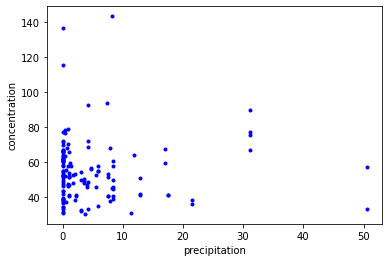

In [34]:
plt.plot(dfcorr[1],dfcorr[2],'b.')
plt.xlabel('precipitation')
plt.ylabel('concentration')

In [35]:
x=np.array(dfcorr[1])
y=np.array(dfcorr[2])
x,y

(array([0.0, 0.0, 7.9, 7.9, 4.239, 4.239, 4.239, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 1.048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.132, 0.132, 17.023, 17.023, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 4.307, 11.41, 50.563, 50.563, 0.1, 3.116,
        3.116, 3.116, 3.116, 1.444, 0.0, 31.084, 31.084, 31.084, 31.084,
        0.446, 0.446, 0.446, 0.0, 7.329, 2.009, 2.009, 1.273, 0.107, 0.107,
        0.107, 0.402, 0.762, 0.022, 11.798, 0.128, 0.128, 8.25, 8.25,
        1.026, 1.026, 0.1, 8.347, 8.347, 8.347, 8.347, 8.347, 8.347, 8.347,
        21.565, 21.565, 4.151, 0.022, 0.022, 0.022, 0.893, 0.893, 1.116,
        3.526, 3.526, 3.526, 12.912, 12.912, 12.912, 7.615, 7.615, 7.615,
        7.615, 1.116, 1.116, 1.116, 1.116, 4.687, 4.687, 0.0, 0.0, 0.0,
        5.906, 5.906, 5.906, 5.906, 3.772, 5.561, 5.561, 1.785, 1.785, 0.0,
        0.0, 0.535, 0.535, 0.893, 0.893, 0.893, 0.893, 4.103, 4.103,
        17.555, 17.555, 2.23, 2.23], dtype=o

In [36]:
import scipy.stats
print('Pearson Result',scipy.stats.pearsonr(x, y), scipy.stats.spearmanr(x, y), scipy.stats.kendalltau(x, y))

#Oftewel: Geen correlatie


Pearson Result (0.012110639594674913, 0.8887116480620811) SpearmanrResult(correlation=-0.09405734172879872, pvalue=0.2760746413402855) KendalltauResult(correlation=-0.0705182173815979, pvalue=0.2394938561821237)


(14300, 18901.0)

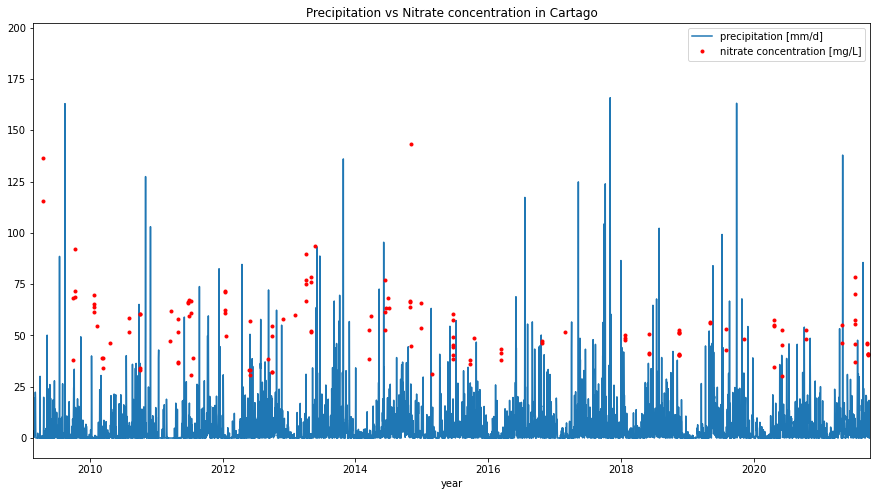

In [37]:
plt.figure(figsize=[15,8])
plt.plot(CR['precip'],label='precipitation [mm/d]')
plt.plot(Res2019,'r.',label = 'nitrate concentration [mg/L]')
plt.legend()
plt.xlabel('year')
plt.title('Precipitation vs Nitrate concentration in Cartago')
plt.xlim(14300,18901.0)

In [38]:
RScart=read_csv('ITCR,Cartago.csv', parse_dates=[1],skiprows=[0], skipinitialspace=True,delimiter=';',index_col=None)

In [39]:
month1=np.zeros(31)
month2=np.zeros(28)
month3=np.zeros(31)
month4=np.zeros(30)
month5=np.zeros(31)
month6=np.zeros(30)
month7=np.zeros(31)
month8=np.zeros(31)
month9=np.zeros(30)
month10=np.zeros(31)
month11=np.zeros(30)
month12=np.zeros(31)

allrain=np.zeros(146*33)

for i in range(len(month1)):
    month1[i]=RScart.iloc[0][2+i]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11][2+i]

year2010 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))


In [40]:
for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12][2+i]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12][2+i]
    
year2011 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12][2+i]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12][2+i]
for i in range(len(month4)):
    month4[i]=np.nan
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12-1][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12-1][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12-1][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12-1][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12-1][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12-1][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12-1][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12-1][2+i]
    
year2012 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12)) #Fixed until 2012

for i in range(len(month1)):
    month1[i]=RScart.iloc[35][2+i]
for i in range(len(month2)):
    month2[i]=RScart.iloc[36][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[37][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[38][2+i]
for i in range(len(month5)):
    month5[i]=np.nan
for i in range(len(month6)):
    month6[i]=np.nan
for i in range(len(month7)):
    month7[i]=RScart.iloc[39][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[40][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[41][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[42][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[43][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[44][2+i]
    
year2013 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[45][2+i]
for i in range(len(month2)):
    month2[i]=RScart.iloc[46][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[47][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[48][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[49][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[50][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[51][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[52][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[53][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[54][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[55][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[56][2+i] #Tot hier gefixt
    
year2014 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))
for i in range(len(month1)):
    month1[i]=RScart.iloc[45+12][2+i]
for i in range(len(month2)):
    month2[i]=RScart.iloc[46+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[47+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[48+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[49+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[50+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[51+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[52+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[53+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[54+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[55+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[56+12][2+i]
    
year2015 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12+12+12+12+12][2+i] #72
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12+12+12+12+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12+12+12+12+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12+12+12+12+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12+12+12+12+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12+12+12+12+12][2+i]
    
year2016 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=np.nan  #+[7*12]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12+12+12+12+12+12-1][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12+12+12+12+12+12-1][2+i]
    
year2017 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12+12+12+12+12+12+12][2+i]  #+[8*12]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12+12+12+12+12+12+12][2+i]
    
year2018 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12+12+12+12+12+12+12+12][2+i]  #+[9*12]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12+12+12+12+12+12+12+12][2+i]
    
year2019 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12+12+12+12+12+12+12+12+12][2+i]  #+[10*12]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12+12+12+12+12+12+12+12+12][2+i]
    
year2020 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12+12+12+12+12+12+12+12+12+12][2+i]  #+[11*12]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month8)):
    month8[i]=RScart.iloc[7+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month9)):
    month9[i]=RScart.iloc[8+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month10)):
    month10[i]=RScart.iloc[9+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month11)):
    month11[i]=RScart.iloc[10+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month12)):
    month12[i]=RScart.iloc[11+12+12+12+12+12+12+12+12+12+12+12][2+i]
    
year2021 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))

for i in range(len(month1)):
    month1[i]=RScart.iloc[0+12+12+12+12+12+12+12+12+12+12+12+12][2+i]  #+[12*12]
for i in range(len(month2)):
    month2[i]=RScart.iloc[1+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month3)):
    month3[i]=RScart.iloc[2+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month4)):
    month4[i]=RScart.iloc[3+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month5)):
    month5[i]=RScart.iloc[4+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month6)):
    month6[i]=RScart.iloc[5+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
for i in range(len(month7)):
    month7[i]=RScart.iloc[6+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
# for i in range(len(month8)):
#     month8[i]=RScart.iloc[7+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
# for i in range(len(month9)):
#     month9[i]=RScart.iloc[8+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
# for i in range(len(month10)):
#     month10[i]=RScart.iloc[9+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
# for i in range(len(month11)):
#     month11[i]=RScart.iloc[10+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
# for i in range(len(month12)):
#     month12[i]=RScart.iloc[11+12+12+12+12+12+12+12+12+12+12+12+12][2+i]
    
year2022 = np.concatenate((month1,month2,month3,month4,month5,month6,month7))#,month8,month9,month10,month11,month12))


In [41]:
RScart.iloc[36][2]

0.9

In [42]:
# year1 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12))
# year2
# year3
# year4
# year5
# year6
# year7
# year8
# year9
# year10

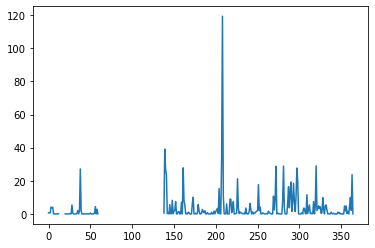

In [43]:

for i in range(len(year2012)):
    if year2012[i]==-99:
        year2012[i]=np.nan
plt.plot(year2012)

In [44]:
RScart.iloc[0:1,2:33]

,Día 1,Día 2,Día 3,Día 4,Día 5,Día 6,Día 7,Día 8,Día 9,Día 10,...,Día 22,Día 23,Día 24,Día 25,Día 26,Día 27,Día 28,Día 29,Día 30,Día 31
0,0.1,2.2,0.0,0.0,0.8,4.7,0.8,0.0,0.0,2.4,...,0.0,0.0,0.0,1.4,0.1,0.0,0.0,0.6,0.0,0.0
